The notebook is divided into 3 sections and each section describes a specific type of bias, as listed below:
- Section #1: Representation of the real world population
- Section #2: Underrepresented populations
- Section #3: Label Distribution for Protected Attribute Groups
- Section #4: Label distribution for missing values of protected attributes

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

plt.style.use('ggplot')

In [44]:
df = pd.read_csv("Final_CSVs/swell.csv")
df

,PP,C,Condition,timestamp,HR,RMSSD,SCL,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,PP1,1,R,20120918T131600000,999,999.000000,80.239727,NaN,NaN,NaN,NaN,999 is NaN
1,PP1,1,R,20120918T131700000,61,0.061420,77.365127,NaN,NaN,NaN,NaN,NaN
2,PP1,1,R,20120918T131800000,64,0.049663,77.359559,NaN,NaN,NaN,NaN,NaN
3,PP1,1,R,20120918T131900000,60,0.052487,76.728772,NaN,NaN,NaN,NaN,NaN
4,PP1,1,R,20120918T132000000,61,0.051189,76.512877,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3135,PP25,3,T,20121107T161500000,999,999.000000,999.000000,NaN,added,NaN,NaN,NaN
3136,PP25,3,T,20121107T161600000,999,999.000000,999.000000,NaN,added,NaN,NaN,NaN
3137,PP25,3,T,20121107T161700000,999,999.000000,999.000000,NaN,added,NaN,NaN,NaN
3138,PP25,3,T,20121107T161800000,999,999.000000,999.000000,NaN,added,NaN,NaN,NaN


In [45]:
df = df.drop(columns=["Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "C"])

In [46]:
df['Condition'] = np.where(df['Condition']=='N',0,df['Condition'])
df['Condition'] = np.where(df['Condition']=='R',0,df['Condition'])
df['Condition'] = np.where(df['Condition']=='I',1,df['Condition'])
df['Condition'] = np.where(df['Condition']=='T',1,df['Condition'])

In [47]:
df

,PP,Condition,timestamp,HR,RMSSD,SCL
0,PP1,0,20120918T131600000,999,999.000000,80.239727
1,PP1,0,20120918T131700000,61,0.061420,77.365127
2,PP1,0,20120918T131800000,64,0.049663,77.359559
3,PP1,0,20120918T131900000,60,0.052487,76.728772
4,PP1,0,20120918T132000000,61,0.051189,76.512877
...,...,...,...,...,...,...
3135,PP25,1,20121107T161500000,999,999.000000,999.000000
3136,PP25,1,20121107T161600000,999,999.000000,999.000000
3137,PP25,1,20121107T161700000,999,999.000000,999.000000
3138,PP25,1,20121107T161800000,999,999.000000,999.000000


In [48]:
# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")

# Merge the dataframes based on the 'PP' column
df = df.merge(df_user_info, on="PP", how="left")

df

,PP,Condition,timestamp,HR,RMSSD,SCL,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress,heart disease,medicine,Internal control index
0,PP1,0,20120918T131600000,999,999.000000,80.239727,27,m,student,right,no,6,6,6,6,6,no,no,"2,93"
1,PP1,0,20120918T131700000,61,0.061420,77.365127,27,m,student,right,no,6,6,6,6,6,no,no,"2,93"
2,PP1,0,20120918T131800000,64,0.049663,77.359559,27,m,student,right,no,6,6,6,6,6,no,no,"2,93"
3,PP1,0,20120918T131900000,60,0.052487,76.728772,27,m,student,right,no,6,6,6,6,6,no,no,"2,93"
4,PP1,0,20120918T132000000,61,0.051189,76.512877,27,m,student,right,no,6,6,6,6,6,no,no,"2,93"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,PP25,1,20121107T161500000,999,999.000000,999.000000,26,m,MSc Technische Informatica,right,yes,6,6,6,2,6,no,no,"3,79"
3136,PP25,1,20121107T161600000,999,999.000000,999.000000,26,m,MSc Technische Informatica,right,yes,6,6,6,2,6,no,no,"3,79"
3137,PP25,1,20121107T161700000,999,999.000000,999.000000,26,m,MSc Technische Informatica,right,yes,6,6,6,2,6,no,no,"3,79"
3138,PP25,1,20121107T161800000,999,999.000000,999.000000,26,m,MSc Technische Informatica,right,yes,6,6,6,2,6,no,no,"3,79"


In [49]:
df.columns

Index(['PP', 'Condition', 'timestamp', 'HR', 'RMSSD', 'SCL', 'Age', 'Gender',
       'Occupation', 'Dominant hand', 'Glasses', 'smoke', 'coffee', 'alcohol',
       'physical', 'stress', 'heart disease', 'medicine',
       'Internal control index'],
      dtype='object')

In [50]:
df['Age_Group'] = np.where(df['Age'] < 30, '<30', '>=30')

In [51]:
# Extract the date part from the timestamp string
df['Date'] = df['timestamp'].str[:8]

# Convert the date string to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [52]:
df.Date

0      2012-09-18
1      2012-09-18
2      2012-09-18
3      2012-09-18
4      2012-09-18
          ...    
3135   2012-11-07
3136   2012-11-07
3137   2012-11-07
3138   2012-11-07
3139   2012-11-07
Name: Date, Length: 3140, dtype: datetime64[ns]

### Section #1: Representation of the real world population
Is the dataset sample representative of the real-world population?

#### Gender Ratio

In [11]:
# real population distribution in 2012 (SWELL-KW data collection year) in Europe
real_distribution = {
    "Gender": {'MALE': 48.23, 'FEMALE': 51.77}, # 0: male, 1: female (https://www.census.gov/data-tools/demo/idb/#/dashboard?COUNTRY_YEAR=2012&COUNTRY_YR_ANIM=2012&CCODE_SINGLE=*W&CCODE=*W)
}
real_distribution

{'Gender': {'MALE': 48.23, 'FEMALE': 51.77}}

In [12]:
# dataset population distribution in 2012 (SWELL-KW data collection year) in Europe
swell_distribution = {
    "Gender": {'m': 0, 'f': 1}, # 0: male, 1: female
}

# unique users
df_p1 = df.groupby(['PP']).first().reset_index()

for attribute in real_distribution:
    counts = df_p1[attribute].value_counts()
    swell_distribution.get(attribute).update(counts)
swell_distribution

{'Gender': {'m': 17, 'f': 8}}

In [13]:
# compute the ratio for the gender
real_ratio = list(real_distribution.get('Gender').values())[0] / list(real_distribution.get('Gender').values())[1]
dataset_ratio = list(swell_distribution.get('Gender').values())[0] / list(swell_distribution.get('Gender').values())[1]
real_ratio, dataset_ratio

(0.9316206297083252, 2.125)

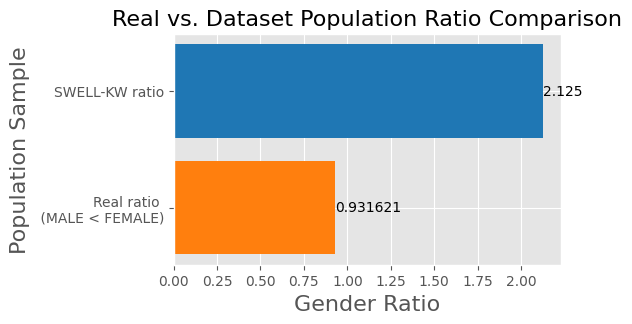

In [15]:
y = ['Real ratio \n (MALE < FEMALE)', 'SWELL-KW ratio']
x = [real_ratio, dataset_ratio]
f, ax = plt.subplots()
f.set_figwidth(5)
f.set_figheight(3)
bars = ax.barh(y,x, color=['#ff7f0e', '#1f77b4'])
ax.bar_label(bars)
plt.ylabel('Population Sample', fontsize=16)
plt.xlabel('Gender Ratio', fontsize=16)
plt.title('Real vs. Dataset Population Ratio Comparison', fontsize=16)
plt.savefig('Images/SWELL1.png', bbox_inches='tight')
plt.show()

#### Age Ratio

In [16]:
# real population distribution in 2012 (SWELL-KW data collection year) in Europe
real_distribution = {
    "Age": {'<30': 34.54, '>=30': 65.46}, # 0: <30, 1: >=30 (https://www.census.gov/data-tools/demo/idb/#/dashboard?COUNTRY_YEAR=2012&COUNTRY_YR_ANIM=2012&CCODE_SINGLE=*W&CCODE=*W)
}
real_distribution

{'Age': {'<30': 34.54, '>=30': 65.46}}

In [17]:
# Create a new DataFrame with unique 'PP', 'Age_Group' combinations
unique_age_groups = df[['PP', 'Age_Group']].drop_duplicates()

# Group by 'Age_Group' and count the number of unique 'PP' in each group
age_group_counts = unique_age_groups.groupby('Age_Group').size().reset_index(name='Count')
age_group_counts

,Age_Group,Count
0,<30,24
1,>=30,1


In [18]:
# real population distribution in 2012 in Europe
real_distribution = {
    "Age_Group": {'<30': 40.675, '>=30': 59.325}, # 0: <30, 1: >=30 (https://www.visualcapitalist.com/the-worlds-population-2020-by-age/) [33.2 + 29.9/4 = 40.675]
}
real_distribution

{'Age_Group': {'<30': 40.675, '>=30': 59.325}}

In [19]:
# dataset population distribution in 2020 in the world
swell_distribution = {
    "Age_Group": {'<30': 0, '>=30': 1}, # 0: <30, 1: >=30
}

# unique users
df_p1 = df.groupby(['PP']).first().reset_index()

for attribute in real_distribution:
    counts = df_p1[attribute].value_counts()
    swell_distribution.get(attribute).update(counts)
swell_distribution

{'Age_Group': {'<30': 24, '>=30': 1}}

In [20]:
# compute the ratio for the age
real_ratio = list(real_distribution.get('Age_Group').values())[0] / list(real_distribution.get('Age_Group').values())[1]
dataset_ratio = list(swell_distribution.get('Age_Group').values())[0] / list(swell_distribution.get('Age_Group').values())[1]
real_ratio, dataset_ratio

(0.6856300042140749, 24.0)

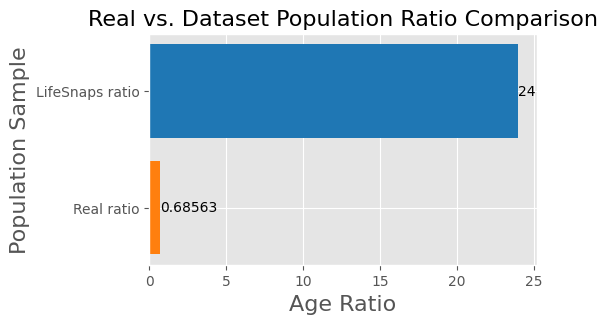

In [21]:
y = ['Real ratio', 'LifeSnaps ratio']
x = [real_ratio, dataset_ratio]
f, ax = plt.subplots()
f.set_figwidth(5)
f.set_figheight(3)
bars = ax.barh(y,x, color=['#ff7f0e', '#1f77b4'])
ax.bar_label(bars)
plt.ylabel('Population Sample', fontsize=16)
plt.xlabel('Age Ratio', fontsize=16)
plt.title('Real vs. Dataset Population Ratio Comparison', fontsize=16)
plt.savefig('images/SWELL2.png', bbox_inches='tight')
plt.show()

### Section #2: Underrepresented populations
Are there underrepresented populations in the dataset?

In [53]:
# number of samples per protected attribute
representation_df = pd.DataFrame(columns=['Class', 'Samples', 'Attribute'])
for attribute in ['Gender', 'Age_Group']:
    attribute_df = df_p1[attribute].value_counts().reset_index(drop=False)
    attribute_name = attribute_df.columns[0]
    attribute_df.rename(columns={attribute_df.columns[0]: 'Class', attribute_df.columns[1]: 'Samples'}, inplace=True)
    attribute_df['Attribute'] = attribute
    representation_df = pd.concat([representation_df, attribute_df], axis=0)
representation_df

,Class,Samples,Attribute
0,m,17,Gender
1,f,8,Gender
0,<30,24,Age_Group
1,>=30,1,Age_Group


In [54]:
# Data setup
representation_df = pd.DataFrame({
    'Class': ['m', 'f', '<30', '>=30'],
    'Samples': [17, 8, 24, 1],
    'Attribute': ['gender', 'gender', 'age', 'age']
})
representation_df

,Class,Samples,Attribute
0,m,17,gender
1,f,8,gender
2,<30,24,age
3,>=30,1,age


C:\Users\alexi\AppData\Local\Temp\ipykernel_15920\1846986722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=['#1f77b4', '#ff7f0e'], aspect=.5)
C:\Users\alexi\AppData\Local\Temp\ipykernel_15920\1846986722.py:2: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=['#1f77b4', '#ff7f0e'], aspect=.5)


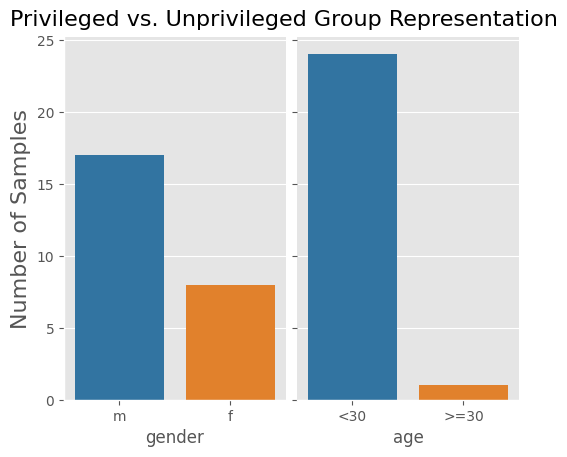

In [55]:
# create the plot to visualize the samples per class per protected attribute
g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=['#1f77b4', '#ff7f0e'], aspect=.5)
g.set_titles("{col_name}", fontsize=16)
g.set_ylabels('Number of Samples', fontsize=16)
plt.suptitle("Privileged vs. Unprivileged Group Representation", fontsize=16)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
# for c in g.axes.flat[0].containers:
#     labels = [int(v.get_height()) for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')
plt.subplots_adjust(wspace=0.05, bottom=0.2, left=0.06)
plt.savefig('Images/SWELL3.png', bbox_inches='tight')
plt.show()

In [56]:
import pandas as pd

# Grouping by Age_Group and Gender and counting the occurrences
df_intersectionality = pd.DataFrame(df_p1.groupby(['Age_Group', 'Gender']).count().reset_index())
df_intersectionality = df_intersectionality[['Age_Group', 'Gender', 'PP']]
df_intersectionality.rename(columns={'id': 'Samples'}, inplace=True)

# Creating a list with length 3
group_labels = ['Female <30', 'Male <30', 'Female >=30']

# Assigning the list to the 'Group' column
df_intersectionality['Group'] = group_labels

# Dropping unnecessary columns
df_intersectionality.drop(columns=['Age_Group', 'Gender'], inplace=True)

# Displaying the DataFrame
df_intersectionality


,PP,Group
0,7,Female <30
1,17,Male <30
2,1,Female >=30


In [57]:
# examine the representation on the LifeSnaps dataset based on the intersectionality of age and gender
# df_intersectionality = pd.DataFrame(df_p1.groupby(['Age_Group', 'Gender']).count().reset_index())
# df_intersectionality = df_intersectionality[['Age_Group', 'Gender', 'PP']]
# df_intersectionality.rename(columns={'id': 'Samples'}, inplace=True)
# df_intersectionality['Group'] = ['Female <30', 'Male <30', 'Female >=30', 'Male >=30']
# df_intersectionality.drop(columns=['Age_Group', 'Gender'], inplace=True)
# df_intersectionality

C:\Users\alexi\AppData\Local\Temp\ipykernel_15920\3533809829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_intersectionality, x="Group", y="PP", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], aspect=.8)
C:\Users\alexi\AppData\Local\Temp\ipykernel_15920\3533809829.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.catplot(data=df_intersectionality, x="Group", y="PP", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], aspect=.8)


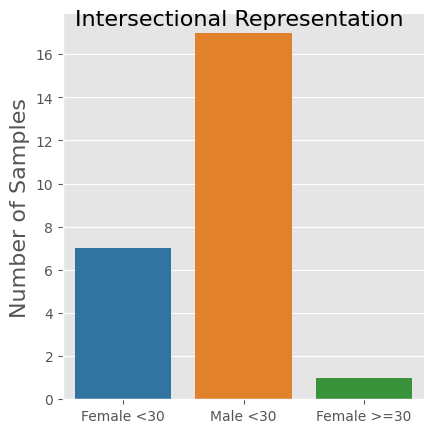

In [58]:
# create the plot to visualize the samples per class per protected attribute
g = sns.catplot(data=df_intersectionality, x="Group", y="PP", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], aspect=.8)
g.set_titles("{col_name}", fontsize=16)
g.set_ylabels('Number of Samples', fontsize=16)
plt.suptitle("Intersectional Representation", fontsize=16)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
# for c in g.axes.flat[0].containers:
#     labels = [int(v.get_height()) for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')
plt.subplots_adjust(wspace=0.05, bottom=0.2, left=0.06)
plt.savefig('images/SWELL4.png', bbox_inches='tight')
plt.show()

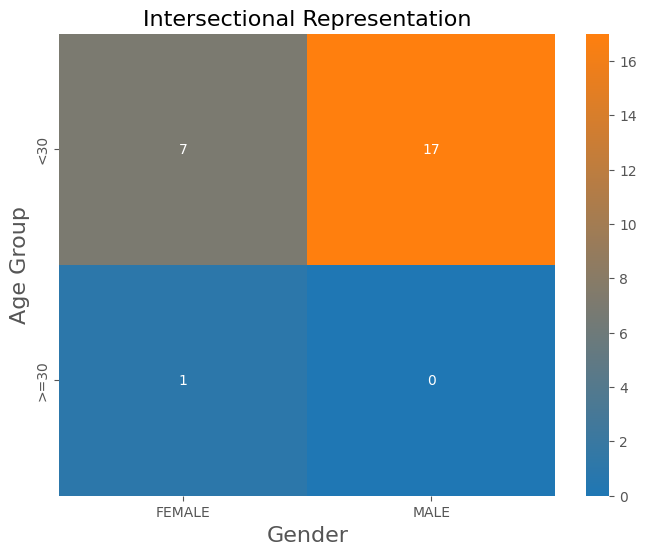

In [32]:
import matplotlib.colors as mcolors

data = {
    'age': ['<30', '<30', '>=30', '>=30'],
    'gender': ['FEMALE', 'MALE', 'FEMALE', 'MALE'],
    'Samples': [7, 17, 1, 0]  # Sample counts for each combination of age and gender
}

# Create a DataFrame from the sample data
df_intersectionality = pd.DataFrame(data)

# Pivot the DataFrame to have age and gender as rows and columns respectively
pivot_df = df_intersectionality.pivot(index='age', columns='gender', values='Samples')

# Define your start and end colors
start_color = "#1f77b4" 
end_color = "#ff7f0e"

# Create a custom colormap using LinearSegmentedColormap
colors = [start_color, end_color]
cmap_name = 'custom_gradient'
n_bins = 1000  # Use a large number of bins for smooth color transition
cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create the heatmap using the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap=cmap, fmt='d')
plt.title('Intersectional Representation', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Age Group', fontsize=16)
plt.savefig('Images/SWELL5.png', bbox_inches='tight')
plt.show()


### [TO BE REMOVED] Section #0: Label Distribution for Protected Attribute Groups Over Time
What is the distribution of the label for each value of the protected attribute over time?

#### Gender

In [178]:
# Filter data for summer period
# df = df[df['date'] < '2021-08-01']

# Define genders
genders = ['m', 'f']

# Create an empty DataFrame to store results
df_p3 = pd.DataFrame(columns=['Gender', 'Date', 'Stressed_Count'])

# Iterate over each gender
for gender in genders:
    # Filter data for the current gender
    df_gender = df[df['Gender'] == gender]
    
    # Group by date and count the number of people stressed (labels == 1)
    df_gender = pd.DataFrame(df_gender.groupby('Date')['Condition'].apply(lambda x: (x == 1).sum()).reset_index())
    
    # Rename columns
    df_gender.columns = ['Date', 'Stressed_Count']
    
    # Add gender column
    df_gender['Gender'] = gender
    
    # Reorder columns
    df_gender = df_gender[['Gender', 'Date', 'Stressed_Count']]
    
    # Append data for the current gender to the result DataFrame
    df_p3 = pd.concat([df_p3, df_gender], ignore_index=True)

# Display the result DataFrame
print(df_p3)


   Gender       Date Stressed_Count
0       m 2012-09-18             69
1       m 2012-09-19             59
2       m 2012-09-24             70
3       m 2012-09-25             69
4       m 2012-10-01             66
5       m 2012-10-02             70
6       m 2012-10-04            125
7       m 2012-10-08             67
8       m 2012-10-09             68
9       m 2012-10-10            135
10      m 2012-10-15             62
11      m 2012-10-19             69
12      m 2012-11-01             67
13      m 2012-11-05             69
14      m 2012-11-07             68
15      f 2012-09-26             67
16      f 2012-10-09             69
17      f 2012-10-15             69
18      f 2012-10-17             69
19      f 2012-10-19             69
20      f 2012-10-29             69
21      f 2012-10-31             46
22      f 2012-11-01             69


In [179]:
average_values = df_p3.groupby(['Gender'])['Stressed_Count'].mean().to_frame()
average_values

,Stressed_Count
Gender,
f,65.875000
m,75.533333


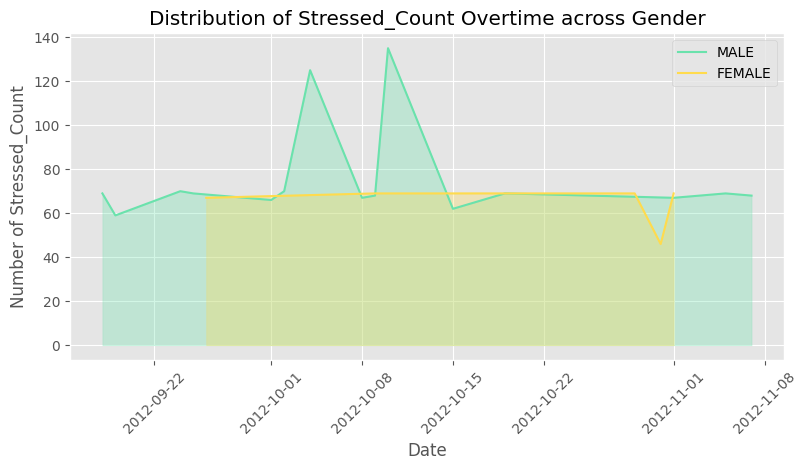

In [181]:
# Filter data for male and female genders
df_male = df_p3[df_p3['Gender'] == 'm'].copy()
df_female = df_p3[df_p3['Gender'] == 'f'].copy()

# Convert 'Date' column to datetime data type
df_male['Date'] = pd.to_datetime(df_male['Date'])
df_female['Date'] = pd.to_datetime(df_female['Date'])

# Convert 'Stressed_Count' column to numeric type
df_male['Stressed_Count'] = pd.to_numeric(df_male['Stressed_Count'], errors='coerce')
df_female['Stressed_Count'] = pd.to_numeric(df_female['Stressed_Count'], errors='coerce')

# Plotting
plt.figure(figsize=(8.2, 4.8))
plt.plot(df_male['Date'], df_male['Stressed_Count'], linestyle='-', color='#6ae2ac', label='MALE')
plt.fill_between(df_male['Date'], df_male['Stressed_Count'], alpha=0.3, color='#6ae2ac')

plt.plot(df_female['Date'], df_female['Stressed_Count'], linestyle='-', color='#ffdb4d', label='FEMALE')
plt.fill_between(df_female['Date'], df_female['Stressed_Count'], alpha=0.3, color='#ffdb4d')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Stressed_Count')
plt.title('Distribution of Stressed_Count Overtime across Gender')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('images/distribution_after_gender.png', bbox_inches='tight')
plt.show()


#### Age

In [184]:
# Filter data for summer period
# df = df[df['date'] < '2021-08-01']

# Define ages
ages = ['<25', '>=25']

# Create an empty DataFrame to store results
df_p3 = pd.DataFrame(columns=['Age_Group', 'Date', 'Stressed_Count'])

# Iterate over each age
for age in ages:
    # Filter data for the current age
    df_age = df[df['Age_Group'] == age]
    
    # Group by date and count the number of people stressed (labels == 1)
    df_age = pd.DataFrame(df_age.groupby('Date')['Condition'].apply(lambda x: (x == 1).sum()).reset_index())
    
    # Rename columns
    df_age.columns = ['Date', 'Stressed_Count']
    
    # Add age column
    df_age['Age_Group'] = age
    
    # Reorder columns
    df_age = df_age[['Age_Group', 'Date', 'Stressed_Count']]
    
    # Append data for the current age to the result DataFrame
    df_p3 = pd.concat([df_p3, df_age], ignore_index=True)

# Display the result DataFrame
print(df_p3)


   Age_Group       Date Stressed_Count
0        <25 2012-09-24             70
1        <25 2012-09-25             69
2        <25 2012-09-26             67
3        <25 2012-10-01             66
4        <25 2012-10-02             70
5        <25 2012-10-09            137
6        <25 2012-10-15             62
7        <25 2012-10-19            138
8        <25 2012-10-29             69
9        <25 2012-10-31             46
10       <25 2012-11-05             69
11      >=25 2012-09-18             69
12      >=25 2012-09-19             59
13      >=25 2012-10-04            125
14      >=25 2012-10-08             67
15      >=25 2012-10-10            135
16      >=25 2012-10-15             69
17      >=25 2012-10-17             69
18      >=25 2012-11-01            136
19      >=25 2012-11-07             68


In [186]:
average_values = df_p3.groupby(['Age_Group'])['Stressed_Count'].mean().to_frame()
average_values

,Stressed_Count
Age_Group,
<25,78.454545
>=25,88.555556


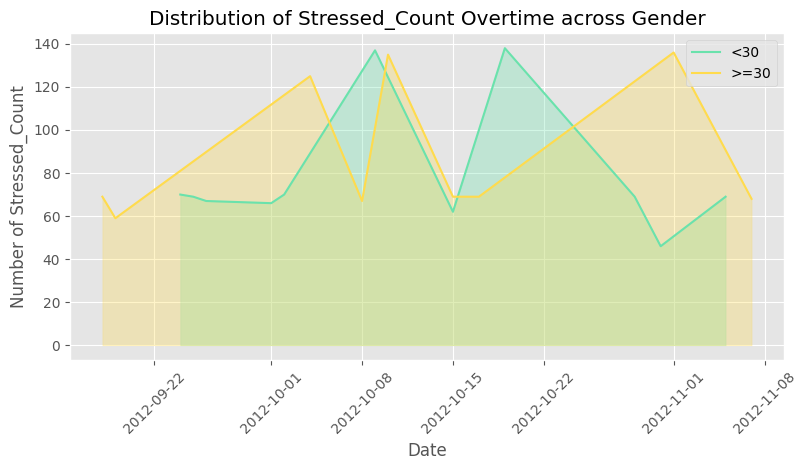

In [188]:
# Assuming df_p3 is your DataFrame containing data for both genders

# Filter data for young and old
df_u30 = df_p3[df_p3['Age_Group'] == '<25'].copy()
df_o30 = df_p3[df_p3['Age_Group'] == '>=25'].copy()

# Convert 'Date' column to datetime data type
df_u30['Date'] = pd.to_datetime(df_u30['Date'])
df_o30['Date'] = pd.to_datetime(df_o30['Date'])

# Convert 'Stressed_Count' column to numeric type
df_u30['Stressed_Count'] = pd.to_numeric(df_u30['Stressed_Count'], errors='coerce')
df_o30['Stressed_Count'] = pd.to_numeric(df_o30['Stressed_Count'], errors='coerce')

# Plotting
plt.figure(figsize=(8.2, 4.8))
plt.plot(df_u30['Date'], df_u30['Stressed_Count'], linestyle='-', color='#6ae2ac', label='<30')
plt.fill_between(df_u30['Date'], df_u30['Stressed_Count'], alpha=0.3, color='#6ae2ac')

plt.plot(df_o30['Date'], df_o30['Stressed_Count'], linestyle='-', color='#ffdb4d', label='>=30')
plt.fill_between(df_o30['Date'], df_o30['Stressed_Count'], alpha=0.3, color='#ffdb4d')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Stressed_Count')
plt.title('Distribution of Stressed_Count Overtime across Gender')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('images/distribution_after_gender.png', bbox_inches='tight')
plt.show()


### Section #4: Label Distribution Across Protected Attribute Groups

Are there are any disparities in the distribution of the target label (stressed vs. not stressed) across different groups of the protected attribute (e.g., gender, age)?

C:\Users\alexi\AppData\Local\Temp\ipykernel_15920\1294020481.py:19: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  max_counts = df.groupby(column)[target_label].value_counts().max(level=0)
C:\Users\alexi\AppData\Local\Temp\ipykernel_15920\1294020481.py:19: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  max_counts = df.groupby(column)[target_label].value_counts().max(level=0)


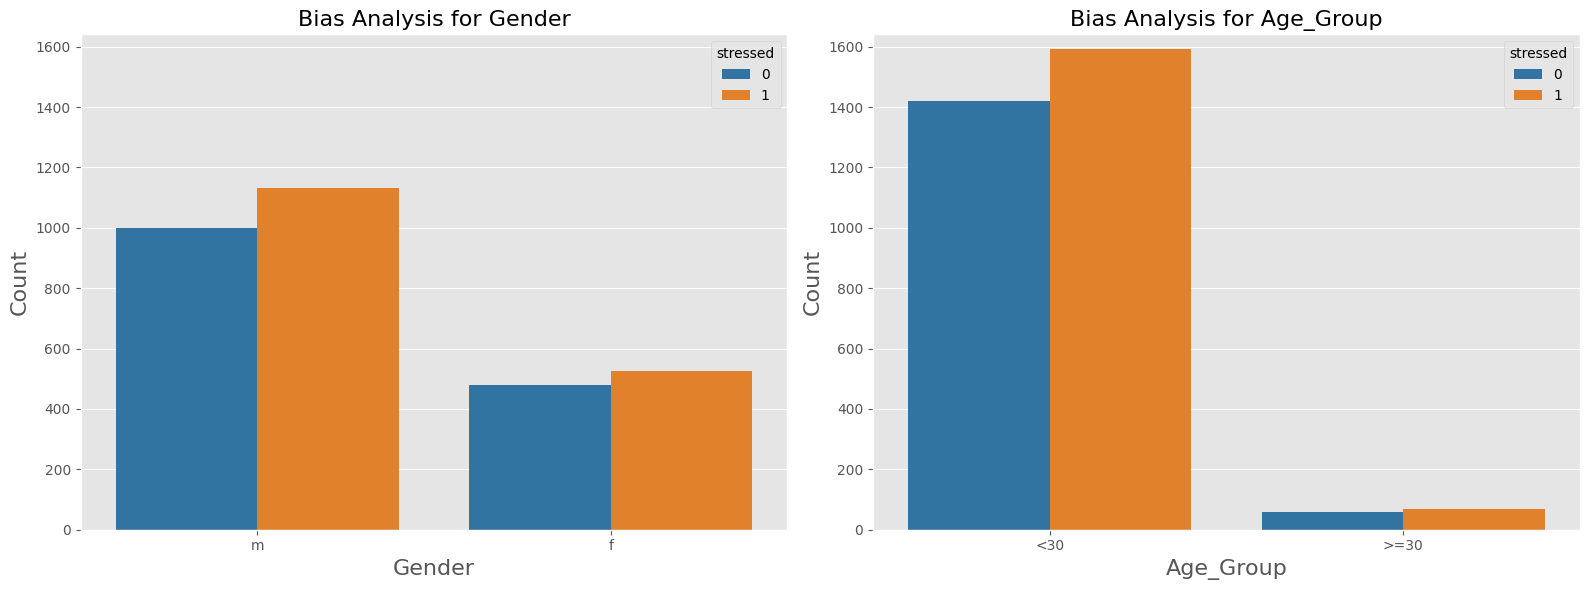

In [34]:
# Define the columns for analysis
columns_for_bias_analysis = ['Gender', 'Age_Group']

# Define the target label column
target_label = 'Condition'

# Define the palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Initialize y-axis limits
y_max = 0

# Visualize bias in each column
for i, column in enumerate(columns_for_bias_analysis):
    # Calculate the maximum count of stressed and non-stressed individuals for each category
    max_counts = df.groupby(column)[target_label].value_counts().max(level=0)
    
    # Update y-axis limits based on the maximum counts
    current_max = max_counts.max()
    if current_max > y_max:
        y_max = current_max
    
    sns.countplot(x=column, hue=target_label, data=df, ax=axes[i], palette=custom_palette)
    axes[i].set_title('Bias Analysis for {}'.format(column), fontsize=16)
    axes[i].set_xlabel(column, fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)
    axes[i].legend(title='stressed')
    
# Set the same y-axis limits for both plots
for ax in axes:
    ax.set_ylim(0, y_max+50)

plt.tight_layout()
plt.savefig('images/SWELL6.png', bbox_inches='tight')
plt.show()


In [35]:
# Define the protected attribute and target label columns
protected_attribute = 'Gender'
target_label = 'Condition'

# Calculate label distribution for each group of the protected attribute
label_distribution = df.groupby(protected_attribute)[target_label].value_counts(normalize=True).unstack()
label_distribution

Condition,0,1
Gender,,
f,0.476143,0.523857
m,0.469072,0.530928


In [36]:
# Define the protected attribute and target label columns
protected_attribute = 'Age_Group'
target_label = 'Condition'

# Calculate label distribution for each group of the protected attribute
label_distribution = df.groupby(protected_attribute)[target_label].value_counts(normalize=True).unstack()
label_distribution

Condition,0,1
Age_Group,,
<30,0.471604,0.528396
>=30,0.465116,0.534884


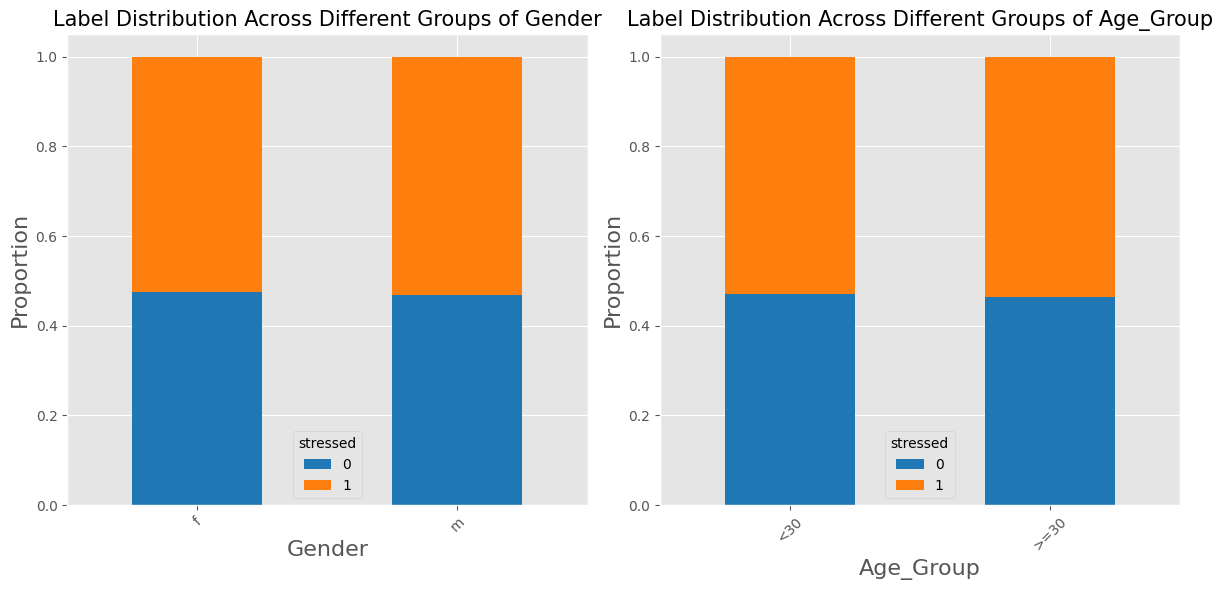

In [40]:
import matplotlib.pyplot as plt

# Define the protected attribute and target label columns for gender
protected_attribute_gender = 'Gender'
target_label_gender = 'Condition'

# Define the palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Calculate label distribution for each group of the protected attribute (gender)
label_distribution_gender = df.groupby(protected_attribute_gender)[target_label_gender].value_counts(normalize=True).unstack()

# Define the protected attribute and target label columns for age
protected_attribute_age = 'Age_Group'
target_label_age = 'Condition'

# Calculate label distribution for each group of the protected attribute (age)
label_distribution_age = df.groupby(protected_attribute_age)[target_label_age].value_counts(normalize=True).unstack()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize label distribution for gender
label_distribution_gender.plot(kind='bar', stacked=True, ax=axes[0], color=custom_palette)
axes[0].set_title('Label Distribution Across Different Groups of {}'.format(protected_attribute_gender), fontsize=15)
axes[0].set_xlabel(protected_attribute_gender, fontsize=16)
axes[0].set_ylabel('Proportion', fontsize=16)
axes[0].legend(title='stressed')
axes[0].tick_params(axis='x', rotation=45)

# Visualize label distribution for age
label_distribution_age.plot(kind='bar', stacked=True, ax=axes[1], color=custom_palette)
axes[1].set_title('Label Distribution Across Different Groups of {}'.format(protected_attribute_age), fontsize=15)
axes[1].set_xlabel(protected_attribute_age, fontsize=16)
axes[1].set_ylabel('Proportion', fontsize=16)
axes[1].legend(title='stressed')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('images/SWELL7.png', bbox_inches='tight')
plt.show()


### Section 5: Label distribution for missing values of protected attributes

What is the distribution of labels (stressed vs. not stressed) within the subsets of data where the gender and age columns are missing?

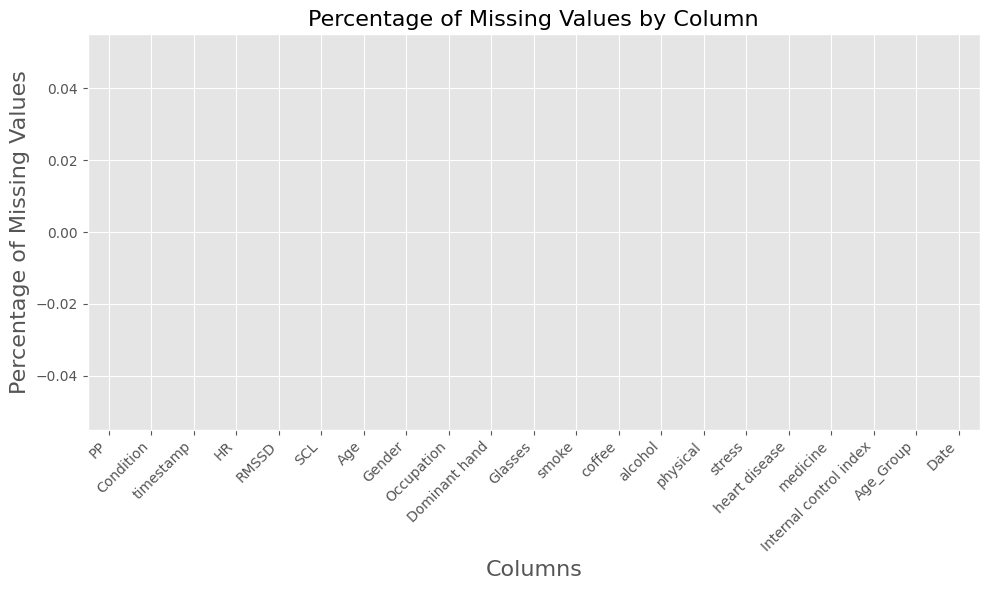

Columns with more than 3% missing values:
Series([], dtype: float64)


In [41]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Visualize missing value percentages
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=16)
plt.ylabel('Percentage of Missing Values', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify columns with high missing value percentages
threshold = 3  # You can adjust the threshold as needed
high_missing_columns = missing_percentage[missing_percentage > threshold]
print('Columns with more than {}% missing values:'.format(threshold))
print(high_missing_columns)